In [1]:
import polars as pl
import matplotlib.pyplot as plt
from models import create_model_pipeline

In [2]:
on_base_lf = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")

responses = ["is_out"]

num_predictors_drop = ["distance_catch_to_home"]

# Parameter grid
param_grid = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'solver': ['saga'],
    'max_iter': [100, 250, 500, 1000]
}

scoring = {
    'log_loss': 'neg_log_loss',
    'brier_score': 'neg_brier_score'
}

refit = "brier_score"

# Train model
results = create_model_pipeline(
    on_base_lf=on_base_lf,
    responses=responses,
    num_predictors_drop=num_predictors_drop,
    model_type="LogisticRegression",
    oversampling_method="SMOTE",
    param_grid=param_grid,
    scoring=scoring,
    refit=refit,
    cv=5,
    verbose=True
)

Total features: 2
Total Predictors: 1
Total Responses: 1

Dataset shape after drop imputation: (4977, 1)
Response distribution: {False: 4835, True: 142}
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best parameters: 
classifier__C = 1
classifier__l1_ratio = 0.7
classifier__max_iter = 100
classifier__penalty = elasticnet
classifier__solver = saga

Best cross-validation score: -0.1241

              precision    recall  f1-score   support

       False       1.00      0.82      0.90      1451
        True       0.12      0.88      0.22        43

    accuracy                           0.82      1494
   macro avg       0.56      0.85      0.56      1494
weighted avg       0.97      0.82      0.88      1494

Brier Score: 0.1277

Predictors:
distance_catch_to_home

Response:
is_out


In [3]:
best_pipeline = results["pipeline"]
grid_search = results["grid_search"]
X_test = results["X_test"]
y_test = results["y_test"]
y_pred = results["y_pred"]
y_pred_proba = results["y_pred_proba"]

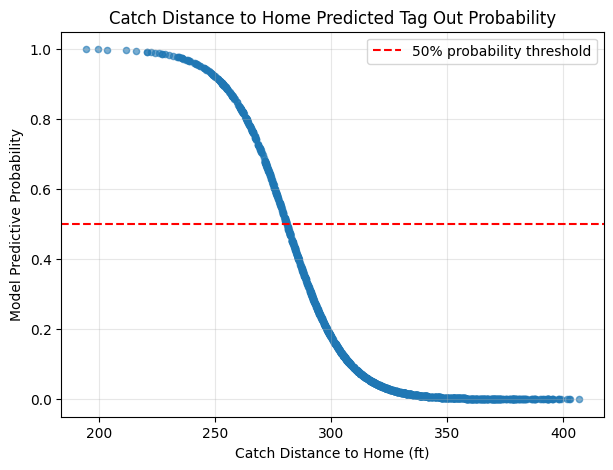

In [4]:
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_pred_proba, alpha=0.6, s=20)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% probability threshold')
plt.xlabel('Catch Distance to Home (ft)')
plt.ylabel('Model Predictive Probability')
plt.title('Catch Distance to Home Predicted Tag Out Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [5]:
test_results = X_test.copy()
test_results['predicted_proba'] = y_pred_proba

distance_threshold = test_results.query("predicted_proba > 0.49 and predicted_proba < 0.51")

distance_threshold

,distance_catch_to_home,predicted_proba
353,280.810653,0.499709
3370,280.958891,0.496751
807,280.300678,0.509885
467,281.198958,0.491961
1179,280.340231,0.509096
2311,281.214416,0.491653
3290,280.553111,0.504848
3666,280.508428,0.505740
1591,281.266061,0.490623
4183,280.431775,0.507269


Exception ignored in: <function ResourceTracker.__del__ at 0x70ded4f7db20>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x779984881b20>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7bf79657db20>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso